# Math 134A Week 7

**Exercise 6.4**
(Two stocks) Two stocks are available. The corresponding expected rates of return are $\overline{r_1}$ and $\overline{r_2}$; the corresponding variances and covariances are $\sigma_1^2$, $\sigma_2^2$, and $\sigma_{12}$. What percentages of total investment should be invested in each of the two stocks to minimize the total variance of the rate of return of the resulting portfolio? What is the mean rate of return of this portfolio?

**Solution:** \
Suppose the weight for stock $1$ is $\alpha$, and the weights for stock $2$ is $1-\alpha$. We want to minimize the function 
$$\alpha^2\sigma_1^2+(1-\alpha)^2\sigma_2^2+2\alpha(1-\alpha)\sigma_{12}$$
This is a concave up quadratic function in $\alpha$. It is minimized when the derivative is zero. The derivative of the above function is 
$$2\alpha\sigma_1^2-2(1-\alpha)\sigma_2^2+(2-4\alpha)\sigma_{12}$$
The above function equals $0$ when $\alpha = \frac{\sigma_2^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$, and the corresponding $1-\alpha$ is $1- \alpha = \frac{\sigma_1^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$. 

Therefore, to minimize the variance of the rate of return of this portfolio, the weights for stock $1$ and stock $2$ are $\frac{\sigma_2^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$ and $\frac{\sigma_1^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}$ respectively. The expected rate of return of this portfolio is $\frac{\sigma_2^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}\overline{r_1} + \frac{\sigma_1^2-\sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}\overline{r_2}$

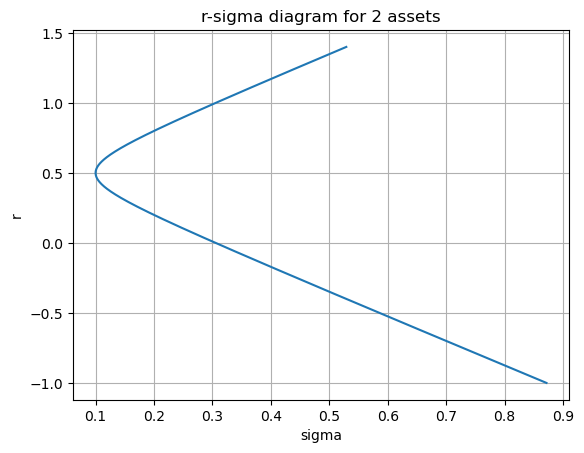

In [20]:
import numpy as np
import matplotlib.pyplot as plt

sigma1 = 0.1
sigma2 = 0.2
r1 = 0.5
r2 = 0.2
rho = 0.5
sigma12 = rho * sigma1 * sigma2

def r(alpha):
    return alpha * r1 + (1 - alpha) * r2

def sigma(alpha):
    return np.sqrt(alpha**2 * sigma1**2 + (1-alpha)**2 * sigma2**2 + 2 * alpha * (1-alpha) * sigma12)

alpha = np.linspace(-4, 4, 1000)

rlist = r(alpha)
sigmalist = sigma(alpha)

plt.plot(sigmalist, rlist)
plt.xlabel('sigma')
plt.ylabel('r')
plt.title('r-sigma diagram for 2 assets')
plt.grid(True)
plt.show()

**Exercise 6.5**. (Rain insurance) Gavin Jones’s friend is planning to invest 1 million in a rock concert to be held 1 year from now. The friend figures that he will obtain 3 million revenue from his 1 million investment—unless, my goodness, it rains. If it rains, he will lose his entire investment. There is a 50% chance that it will rain the day of the concert. Gavin suggests that he buy rain insurance. He can buy one unit of insurance for 0.50, and this unit pays 1 if it rains and nothing if it does not. He may purchase as many units as he wishes, up to 3 million.

(a) What is the expected rate of return on his investment if he buys u units of insurance? (The cost of insurance is in addition to his 1 million investment.) \
(b) What number of units will minimize the variance of his return? What is this minimum value? And what is the corresponding expected rate of return? 

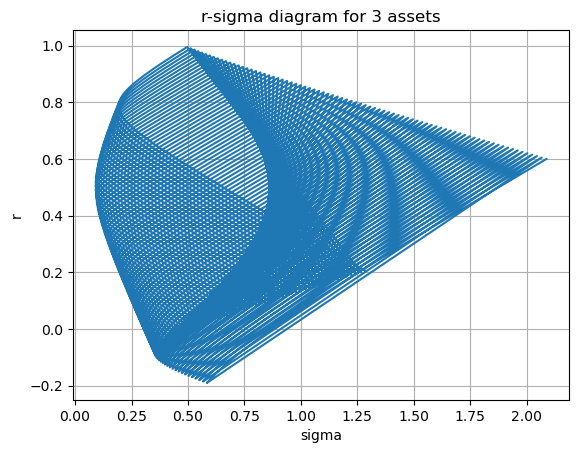

In [19]:
import numpy as np
import matplotlib.pyplot as plt

sigma1 = 0.1
sigma2 = 0.2
sigma3 = 0.4
r1 = 0.5
r2 = 0.2
r3 = 0.4
rho12 = 0.5
rho13 = -0.2
rho23 = 0.1
sigma12 = rho12 * sigma1 * sigma2
sigma13 = rho13 * sigma1 * sigma3
sigma23 = rho23 * sigma2 * sigma3

def r(alpha1, alpha2):
    return alpha1 * r1 + alpha2 * r2 + (1 - alpha1 - alpha2) * r3

def sigma(alpha1, alpha2):
    return np.sqrt(alpha1**2 * sigma1**2 + alpha2**2 * sigma2**2 + (1-alpha1 - alpha2)**2 * sigma3**2 + 2 * alpha1 * alpha2 * sigma12 + 2 * alpha1 * (1-alpha1-alpha2) * sigma13 + alpha2 * (1-alpha1 - alpha2) * sigma23)

alpha1, alpha2 = np.mgrid[-2:2:0.05, -2:2:0.05]

rlist = r(alpha1, alpha2).flatten()
sigmalist = sigma(alpha1, alpha2).flatten()

plt.plot(sigmalist, rlist)
plt.xlabel('sigma')
plt.ylabel('r')
plt.title('r-sigma diagram for 3 assets')
plt.grid(True)
plt.show()

We call the left boundary of this graph as **minimum-variance set**. The point with minimal variance on this graph is called **minimum-variance point**. The upper portion of the minimum-variance set is called the **efficient frontier**, which is what a wise investor would choose. 

**Exercise 6.6**(Wildcats) Suppose there are n assets which are uncorrelated. (They might be n different “wild cat” oil well prospects.) You may invest in any one, or in any combination of them. The mean rate of return $\overline{r}$ is the same for each asset, but the variances are different. The return on asset $i$ has a variance of $\sigma_i^2$ for $i = 1,2,\ldots, n$
(a) Show the situation on an $\overline{r}-\sigma$ diagram. Describe the efficient set.
(b) Find the minimum-variance point. Express your result in terms of 
$$\overline{\sigma}^2 = \left(\sum_1^n \frac{1}{\sigma_i^2}\right)^{-1}$$

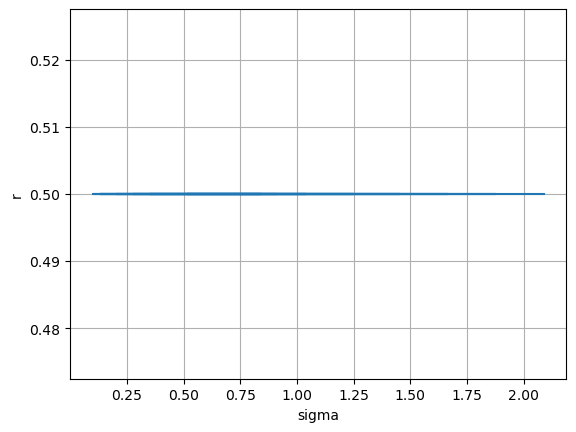

In [18]:
sigma1 = 0.1
sigma2 = 0.2
sigma3 = 0.4
r1 = 0.5
r2 = 0.5
r3 = 0.5
rho12 = 0.5
rho13 = -0.2
rho23 = 0.1
sigma12 = rho12 * sigma1 * sigma2
sigma13 = rho13 * sigma1 * sigma3
sigma23 = rho23 * sigma2 * sigma3

def r(alpha1, alpha2):
    return alpha1 * r1 + alpha2 * r2 + (1 - alpha1 - alpha2) * r3

def sigma(alpha1, alpha2):
    return np.sqrt(alpha1**2 * sigma1**2 + alpha2**2 * sigma2**2 + (1-alpha1 - alpha2)**2 * sigma3**2 + 2 * alpha1 * alpha2 * sigma12 + 2 * alpha1 * (1-alpha1-alpha2) * sigma13 + alpha2 * (1-alpha1 - alpha2) * sigma23)

alpha1, alpha2 = np.mgrid[-2:2:0.5, -2:2:0.5]

rlist = r(alpha1, alpha2).flatten()
sigmalist = sigma(alpha1, alpha2).flatten()

plt.plot(sigmalist, rlist)
plt.xlabel('sigma')
plt.ylabel('r')
plt.grid(True)
plt.show()

# The Markowitz Model for finding the minimum-variance set
Consider a portfolio in $n$ assets with expected return $\overline{r_i}$ and covariance $\sigma_{ij}$. We would like to find the weights $w_i$ for each assets to 
$$\text{minimize } \frac{1}{2}\sum_{i,j = 1}^n w_iw_j \sigma_{ij}$$
$$ \begin{align*} \text{subject to } & \sum_1^n w_i\overline{r_i} = \overline{r} \\ &\sum_1^n w_i = 1\end{align*}$$

By the Lagrange Multipler methods, we need to solve the equations 
$$\begin{align*}\sum_{j = 1}^n \sigma_{ij}w_j-\lambda\overline{r_i}-\mu &= 0 \\ \sum_1^n w_i\overline{r_i} &= \overline{r_i} \\ \sum_1^n w_i &= 1\end{align*}$$

**Exercise 6.7** (Markowitz fun) There are just three assets with rates of return $r_1$ , $r_2$, and $r_3$, respectively. The covariance matrix and the expected rates of return are
$$V = \begin{bmatrix}2 & 1 & 0 \\ 1 & 2 & 1 \\ 0 & 1 & 2\end{bmatrix},\;\;\;\;\overline{r} = \begin{bmatrix}4 \\ 8 \\ 8\end{bmatrix}$$

(a) Find the minimum-variance portfolio. [Hint: By symmetry w1 = w3.] \
(b) Find another efficient portfolio by setting $\lambda = 1, \mu = 0$. 